In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image as Image


import tensorflow as tf
#import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)

seed_choice = 42
tf.keras.utils.set_random_seed(
    seed_choice
)

TensorFlow version: 2.13.0


In [2]:
import pathlib
archive = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants'
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
archive

'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants'

In [4]:
data_dir

WindowsPath('C:/Users/jboak/Dropbox/SynchronizeWork/Datasets/plants')

In [5]:
# Data cleaning and aquiring data
# Use batch image downloader Fatkun. 
# To populate the wilted category, we search the key words "house plant", "healthy house plant", and "indoor plant"
# The population in the healthy category is 145.
# To populate the wilted category, we search the key words "wilted house plant", "wilted indoor plant", and "droopy house plant"
# The population in the wilted category is 143.


# As a first pass at cleaning the data set, we require the image to: 
# show a full, clear view of the plant (not just leaves or trunk)
# no more than three plants in the image
# mostly matured plants (no seedlings)
# images of real plants (no drawings)
# variety of house plants (including succulents, ivies, woody trunked)
# allowing distractions (humans, various pot types, different points of view, plant not in center of the image)
# For healthy category: the image only has healthy plants (no mixture of sick and healthy)
# For wilted category: allow a mixture of sick and healthy


# As a second pass at cleaning the data, we remove links that are broken
# Check the image has correct file formatting (only allow .jpg, convert file type when necessary)
# Remove duplicate images (same file name)



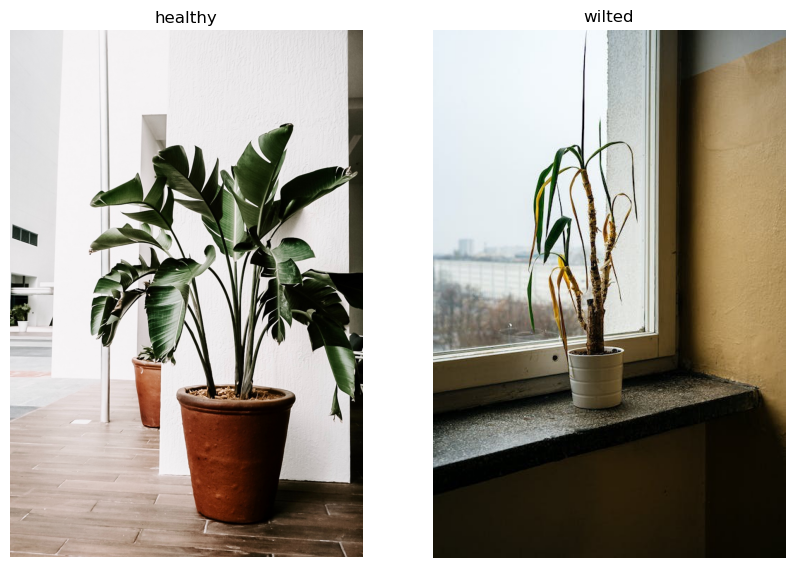

In [6]:
# Example "healthy" due to Julia Kuzenkov 
# (creative commons license) Green Indoor Plants
# https://www.pexels.com/photo/green-indoor-plants-1974508/

# Example "wilted" due to Syn Gor
# (creative commons license) A Wilting Plant on the Windowsill
# https://www.pexels.com/photo/a-wilting-plant-on-the-windowsill-10651660/

plt.figure(figsize=(10, 10))

file = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants\\healthy\\pexels-julia-kuzenkov-1974508.jpg'

with PIL.Image.open(file) as im:
    ax = plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.title('healthy')
    plt.axis("off")
    
file2 = 'C:\\Users\\jboak\\Dropbox\\SynchronizeWork\\Datasets\\plants\\wilted\\pexels-photo-10651660.jpg'

with PIL.Image.open(file2) as im2:
    ax = plt.subplot(1, 2, 2)
    plt.imshow(im2)
    plt.title('wilted')
    plt.axis("off")


In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


288


In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.35,
  subset="training",
  seed=seed_choice,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 288 files belonging to 2 classes.
Using 188 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.35,
  subset="validation",
  seed=seed_choice,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 288 files belonging to 2 classes.
Using 100 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'wilted']


In [12]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(28, 180, 180, 3)
(28,)


In [14]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
6/6 [==============================] - 11s 1s/step - loss: 0.8032 - accuracy: 0.5000 - val_loss: 0.6988 - val_accuracy: 0.4800
Epoch 2/5
6/6 [==============================] - 8s 944ms/step - loss: 0.6891 - accuracy: 0.5053 - val_loss: 0.6883 - val_accuracy: 0.4800
Epoch 3/5
6/6 [==============================] - 8s 965ms/step - loss: 0.6594 - accuracy: 0.5691 - val_loss: 0.6621 - val_accuracy: 0.5800
Epoch 4/5
6/6 [==============================] - 8s 951ms/step - loss: 0.6278 - accuracy: 0.6649 - val_loss: 0.6243 - val_accuracy: 0.6800
Epoch 5/5
6/6 [==============================] - 8s 864ms/step - loss: 0.5472 - accuracy: 0.7394 - val_loss: 0.6272 - val_accuracy: 0.6900


In [17]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
6/6 [==============================] - 6s 390ms/step - loss: 51.1923 - accuracy: 0.5426 - val_loss: 75.5374 - val_accuracy: 0.5200
Epoch 2/5
6/6 [==============================] - 4s 308ms/step - loss: 33.5204 - accuracy: 0.5426 - val_loss: 25.2666 - val_accuracy: 0.5200
Epoch 3/5
6/6 [==============================] - 4s 299ms/step - loss: 13.3382 - accuracy: 0.6277 - val_loss: 4.9941 - val_accuracy: 0.6100
Epoch 4/5
6/6 [==============================] - 4s 280ms/step - loss: 8.4990 - accuracy: 0.6809 - val_loss: 5.4832 - val_accuracy: 0.6400
Epoch 5/5
6/6 [==============================] - 4s 269ms/step - loss: 5.1034 - accuracy: 0.7128 - val_loss: 9.2081 - val_accuracy: 0.5900


In [19]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes)
])

model3.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [20]:
model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
6/6 [==============================] - 10s 1s/step - loss: 0.9450 - accuracy: 0.4681 - val_loss: 0.6860 - val_accuracy: 0.5200
Epoch 2/5
6/6 [==============================] - 7s 907ms/step - loss: 0.6842 - accuracy: 0.5532 - val_loss: 0.6760 - val_accuracy: 0.6400
Epoch 3/5
6/6 [==============================] - 7s 863ms/step - loss: 0.6491 - accuracy: 0.6755 - val_loss: 0.6474 - val_accuracy: 0.6200
Epoch 4/5
6/6 [==============================] - 8s 907ms/step - loss: 0.5967 - accuracy: 0.7234 - val_loss: 0.6156 - val_accuracy: 0.6800
Epoch 5/5
6/6 [==============================] - 8s 897ms/step - loss: 0.5354 - accuracy: 0.7394 - val_loss: 0.6931 - val_accuracy: 0.6300


In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(val_ds)


4/4 [==============================] - 2s 126ms/step


In [23]:
predictions[0]


array([0.55117565, 0.44882438], dtype=float32)

In [24]:
np.argmax(predictions[0])


0

In [25]:
for image_batch, labels_batch in val_ds:
  print(labels_batch)

tf.Tensor([1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 0], shape=(4,), dtype=int32)


In [26]:
i=1

for image_batch_temp, labels_batch_temp in val_ds:
    
    if i == 1:
        test_labels = labels_batch_temp.numpy()
        test_images = image_batch_temp.numpy()
    else:
        test_labels = np.concatenate( (test_labels,labels_batch_temp.numpy()), axis=0 )
        test_images = np.concatenate( (test_images,image_batch_temp.numpy()), axis=0 )

    i = i + 1

display(test_labels)

display(test_images.shape)

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

(100, 180, 180, 3)

In [27]:
test_images = test_images / 255.0


In [28]:
M = 2

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow(img, cmap=plt.cm.binary)
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(M))
  plt.yticks([])
  thisplot = plt.bar(range(M), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

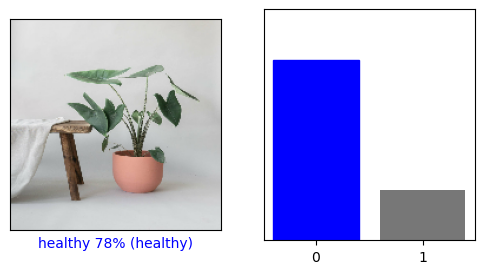

In [29]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

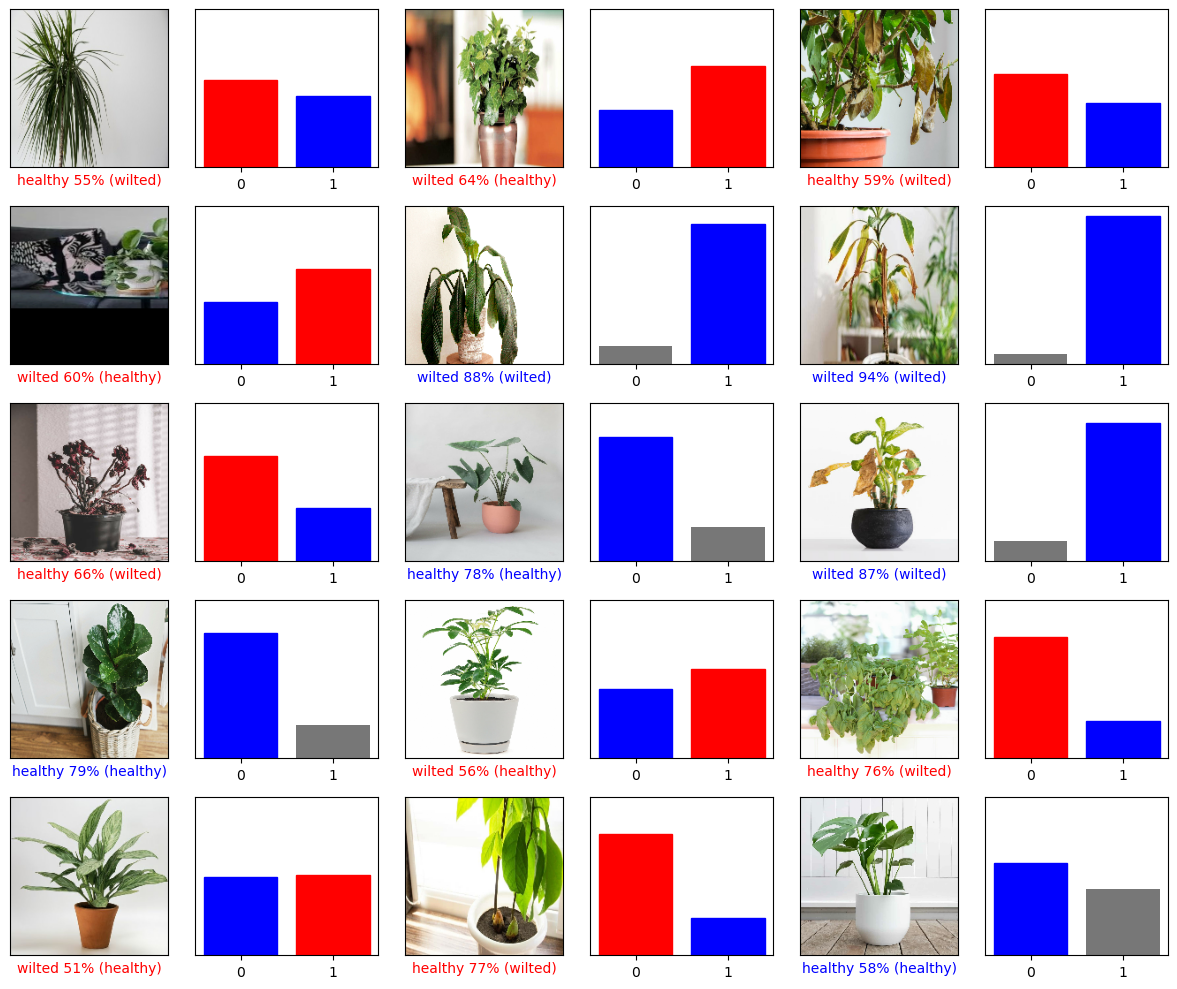

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [1]:
# Ideas to improve?
# Hyperparameter tuning:
    #Optimize over number of epochs.
    #Number of layers, see https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
# Change dataset (add or remove?)
# Use a pretrained model (youtube video)
# How to plot the cross entropy to observe overfitting?

In [1]:
# Redefining the project
# Want images of tulips.
# Single pot of tulips. No other plants in image
# Majority of tulips experiencing drooping (not just one tulip that looks unhealthy)
# Almost complete view of tulip and pot (not too close of a zoom in on leaves/petals)
# Filter out tulips that might have other diseases (discoloration, leaves falling). 
# We only want to be able to detect the early stages of underwatering, when the plant experiences a droop.
# Not too many distractions (people, other plants, miscellaneous objects)

# We began with 198 wilted tulips. We searched for images with keywords: 
# 'wilted tulips','droopy tulips', 'sagging tulips', 'bending tulips', 'limp tulips','dying tulips', and 'withered tulips'
# After cleaning the data, we have 146 wilted tulips.

# conger design
# ostrich-1269064_1280.jpg
# https://pixabay.com/sv/photos/struts-tulpaner-tulpan-bukett-1269064/
# Free to use Pixabay Content License


# We began with 198 healthy tulips. We searched for images with keywords: 
# 'tulips', 'tulips in vase', 'healthy tulips', 'tulips in pot', 'indoor tulips', 'force tulips indoors', 
# 'indoor tulips in vase', 'fresh tulips', 'potted tulips'
# After cleaning the data, we have 174 healthy tulips.

# tulips_flowers_potted_decoration_interior_spring_floral_blossom-686613
# https://pxhere.com/en/photo/686613
# CC0 Public Domain, Free for personal and commercial use



